<a href="https://colab.research.google.com/github/anumfatima427/Dental-Caries-Segmentation/blob/main/Generated_Masks_from_VIA_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primary Perio with Secondary Endo (2)
0
Primary Perio with Secondary Endo (3)
1
Primary Perio with Secondary Endo (4)
2
Primary Perio with Secondary Endo (5)
3
Primary Perio with Secondary Endo (6)
4
Primary Perio with Secondary Endo (7)
5
Primary Perio with Secondary Endo (8)
6
Primary Perio with Secondary Endo (9)
7
Primary Perio with Secondary Endo (10)
8
Primary Perio with Secondary Endo (11)
9
Primary Perio with Secondary Endo (12)
10
Primary Perio with Secondary Endo (13)
11
Primary Perio with Secondary Endo (14)
12
Primary Perio with Secondary Endo (15)
13
Primary Perio with Secondary Endo (16)
14
Primary Perio with Secondary Endo (17)
15
Primary Perio with Secondary Endo (18)
16
Primary Perio with Secondary Endo (19)
17
Primary Perio with Secondary Endo (20)
18
Primary Perio with Secondary Endo (21)
19
Primary Perio with Secondary Endo (22)
20
Primary Perio with Secondary Endo (23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


21
Primary Perio with Secondary Endo (24)
22
Primary Perio with Secondary Endo (25)
23
Primary Perio with Secondary Endo (26)
24
Primary Perio with Secondary Endo (27)
25
Primary Perio with Secondary Endo (28)
26
Primary Perio with Secondary Endo (29)
27
Primary Perio with Secondary Endo (30)
28
Primary Perio with Secondary Endo (31)
29
Primary Perio with Secondary Endo (32)
30
Primary Perio with Secondary Endo (33)
31
Primary Perio with Secondary Endo (34)
32
Primary Perio with Secondary Endo (35)
33
Primary Perio with Secondary Endo (36)
34
Primary Perio with Secondary Endo (37)
35
Primary Perio with Secondary Endo (38)
36
Primary Perio with Secondary Endo (39)
37
Primary Perio with Secondary Endo (40)
38


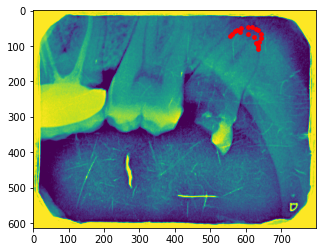

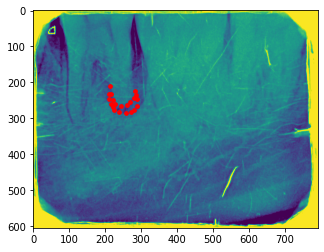

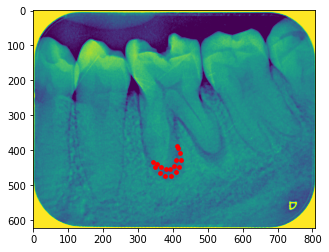

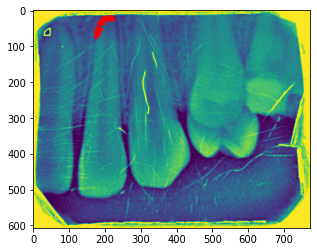

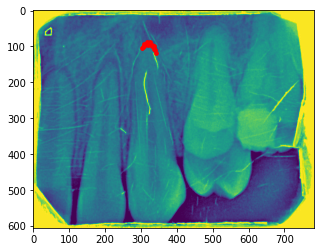

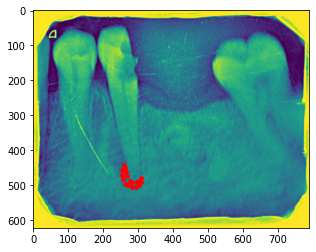

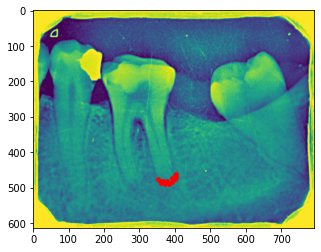

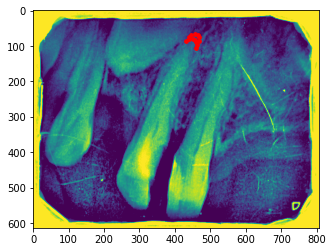

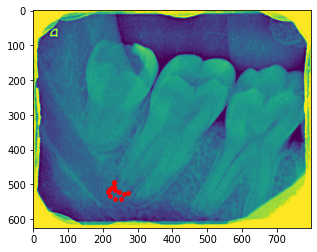

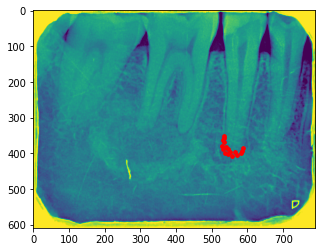

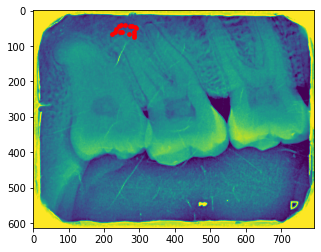

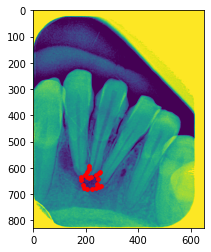

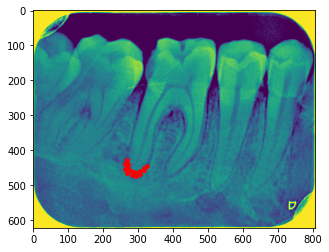

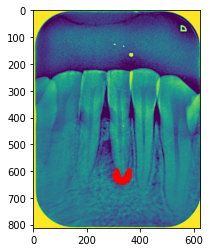

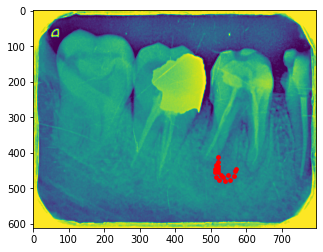

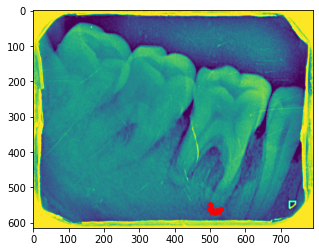

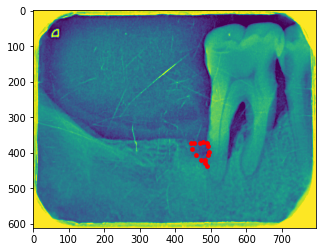

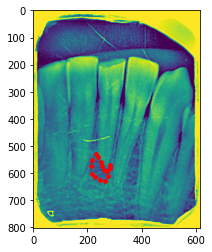

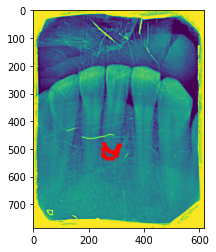

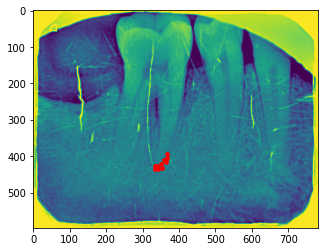

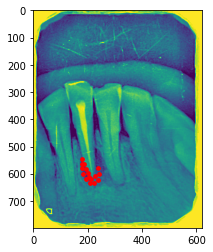

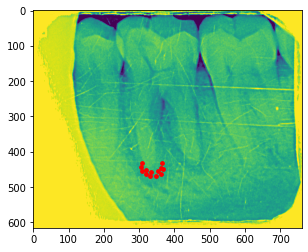

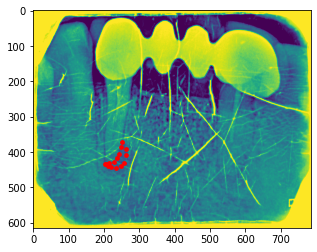

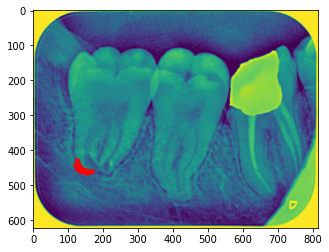

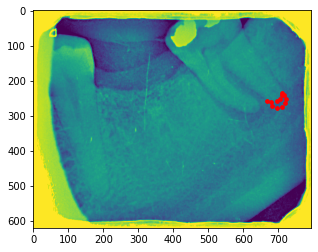

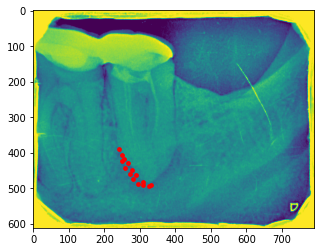

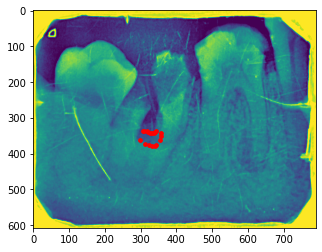

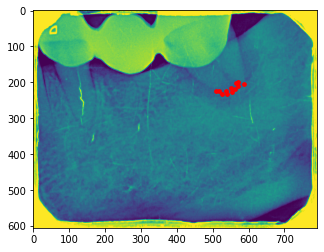

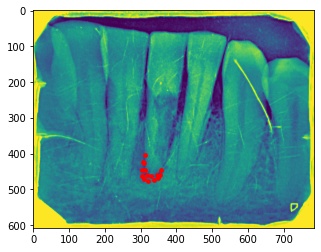

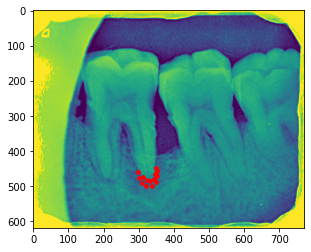

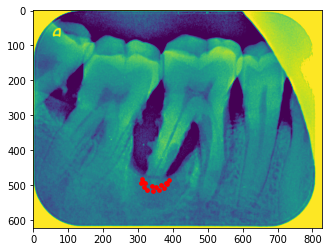

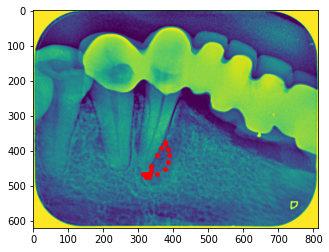

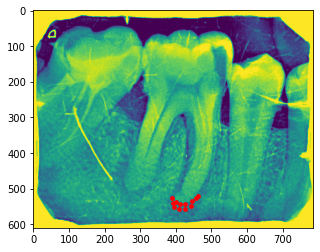

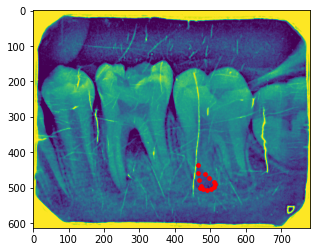

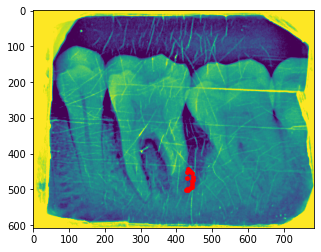

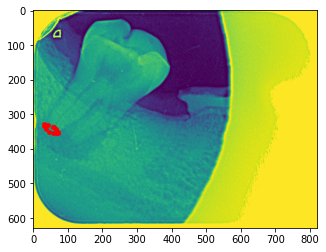

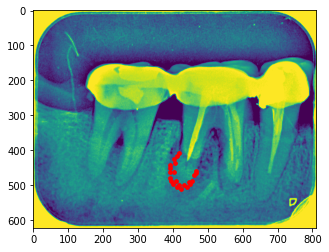

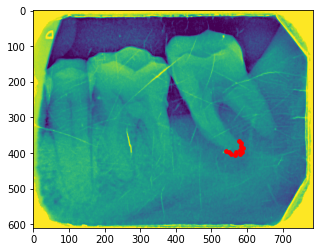

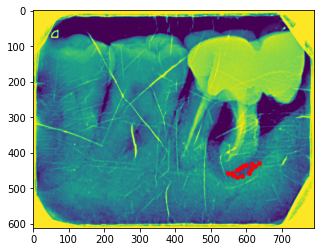

In [ ]:
import json
import os
import numpy as np
import PIL.Image
import cv2
import matplotlib.pyplot as plt


with open("/content/drive/MyDrive/Anum Fatima (MSSE-26) /Code/Dataset/PrimaryEndodontic/PrimaryEndodontic_json.json", "r") as read_file:
    data = json.load(read_file)

all_file_names=list(data.keys())

Files_in_directory = []
for root, dirs, files in os.walk("/content/drive/MyDrive/Anum Fatima (MSSE-26) /Code/Dataset/PrimaryEndodontic/images"):
    for filename in files:
        Files_in_directory.append(filename)
        
for j in range(len(all_file_names)): 
    image_name=data[all_file_names[j]]['filename']
    """ Extracting the name of the image, by removing its extension """
    name = image_name.split(".")[0]
    print(name)
    if image_name in Files_in_directory: 
         img = np.asarray(PIL.Image.open('/content/drive/MyDrive/Anum Fatima (MSSE-26) /Code/Dataset/PrimaryEndodontic/images/'+image_name))    
    else:
        continue
    
    if data[all_file_names[j]]['regions'] != {}:
        #cv2.imwrite('images/%05.0f' % j +'.jpg',img)
        print(j)
        try: 
             shape1_x=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_x']
             shape1_y=data[all_file_names[j]]['regions']['0']['shape_attributes']['all_points_y']
        except : 
             shape1_x=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_x']
             shape1_y=data[all_file_names[j]]['regions'][0]['shape_attributes']['all_points_y']
    
        fig = plt.figure()
      
        plt.imshow(img.astype(np.uint8)) 
        plt.scatter(shape1_x,shape1_y,zorder=2,color='red',marker = '.', s= 55)
        

        ab=np.stack((shape1_x, shape1_y), axis=1)
        
        img2=cv2.drawContours(img, [ab], -1, (255,255,255), -1)
       
        
        
        mask = np.zeros((img.shape[0],img.shape[1]))
        img3=cv2.drawContours(mask, [ab], -1, 255, -1)
       # f"{save_dir}/image/{name}.png"
        #cv2.imwrite('/content/drive/MyDrive/Anum Fatima (MSSE-26) /Thesis/newwork/generatedmasks/{name}.png',mask.astype(np.uint8))
        cv2.imwrite(f'/content/drive/MyDrive/Anum Fatima (MSSE-26) /Code/Dataset/PrimaryEndodontic/masks/{name}.png',mask.astype(np.uint8))
